# Sales Data Analytics

### Data Load

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [195]:
df_sales = pd.read_csv("./dataset.csv")
df_sales.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


### EDA (Exploratory Data Analysis)

In [196]:
df_sales.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [197]:
df_sales.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [198]:
# format date
df_sales["Data_Pedido"] = pd.to_datetime(df_sales["Data_Pedido"], dayfirst=True)
df_sales.dtypes

ID_Pedido               object
Data_Pedido     datetime64[ns]
ID_Cliente              object
Segmento                object
Pais                    object
Cidade                  object
Estado                  object
ID_Produto              object
Categoria               object
SubCategoria            object
Valor_Venda            float64
dtype: object

In [199]:
df_sales["Valor_Venda"].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [200]:
df_sales[df_sales.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [201]:
df_sales.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

### Question 1
What is the total sales by order date? Demonstrate the result through a line graph.

In [202]:
df_total_date = df_sales.groupby("Data_Pedido")["Valor_Venda"].sum()
df_total_date.sort_index(ascending=False).head()

Data_Pedido
2018-12-30     713.7900
2018-12-29    2915.5340
2018-12-28    1657.3508
2018-12-27     177.6360
2018-12-26     814.5940
Name: Valor_Venda, dtype: float64

<Axes: title={'center': 'Total de Vendas por Data'}, xlabel='Data_Pedido'>

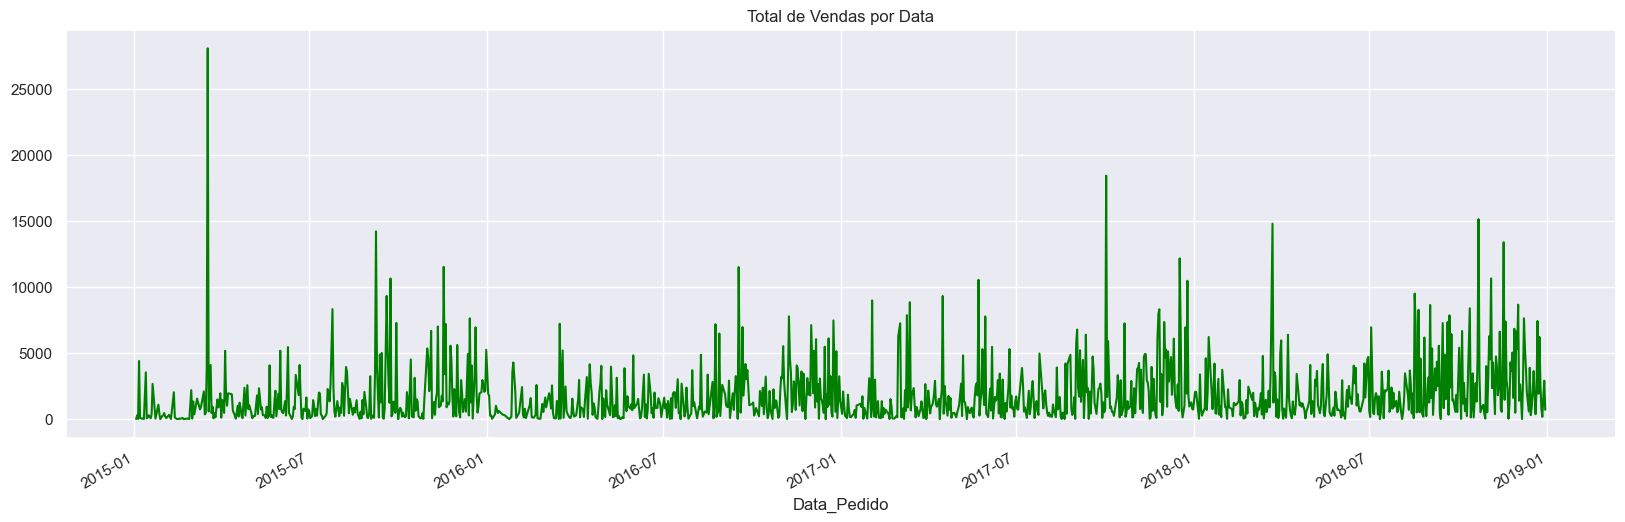

In [203]:
plt.figure(figsize=(20, 6))
plt.title("Total de Vendas por Data")
df_total_date.plot.line(x="Data_Pedido", y="Valor_Venda", color="green")

### Question 2
What is the total sales by state? Demonstrate the result through a bar graph.

In [204]:
df_total_state = df_sales.groupby("Estado")["Valor_Venda"].sum()
df_total_state.sort_values(ascending=False).head()

Estado
California      442927.0975
New York        304536.4010
Texas           163549.8602
Washington      133826.0060
Pennsylvania    114411.6800
Name: Valor_Venda, dtype: float64

<Axes: title={'center': 'Total de Vendas por Estado'}, xlabel='Estado'>

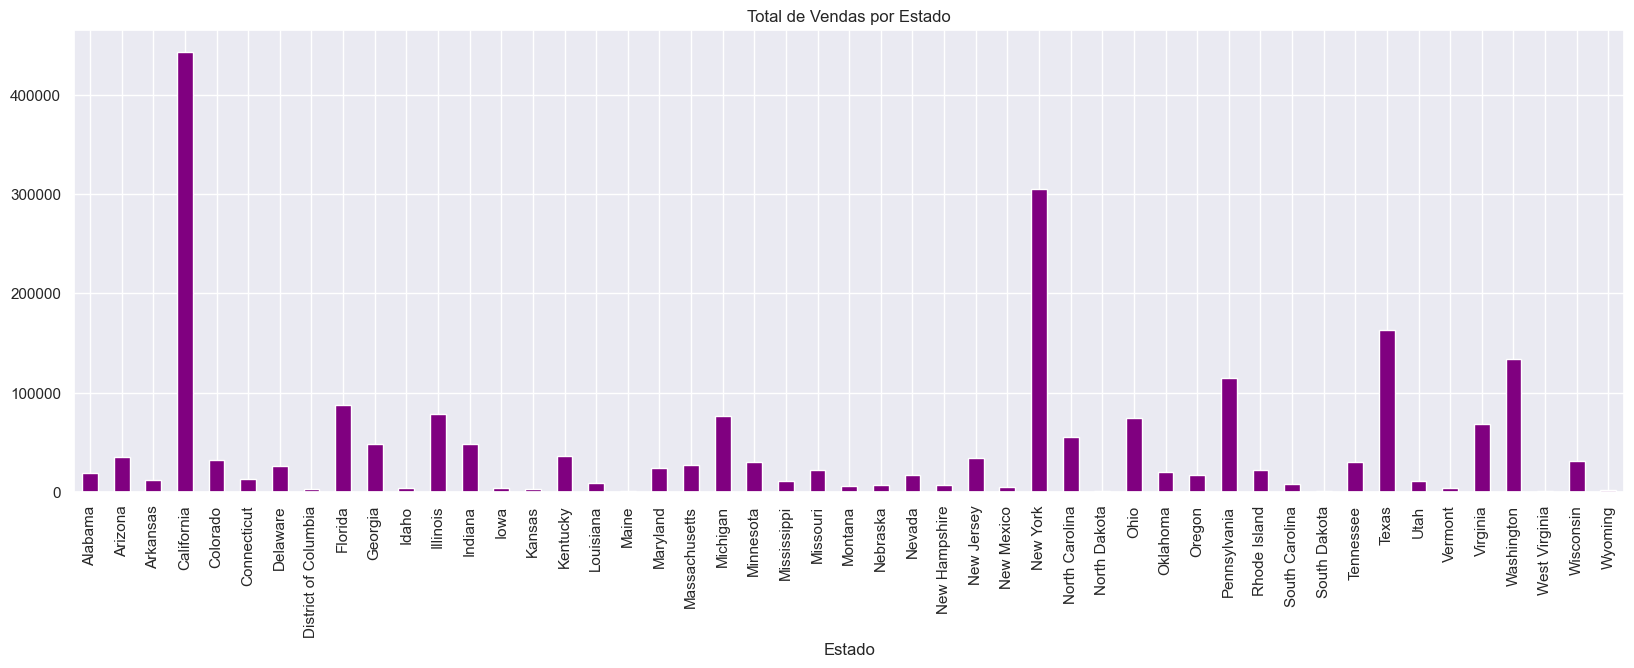

In [205]:
plt.figure(figsize=(20, 6))
plt.title("Total de Vendas por Estado")
df_total_state.plot.bar(x="Estado", y="Valor_Venda", color="purple")

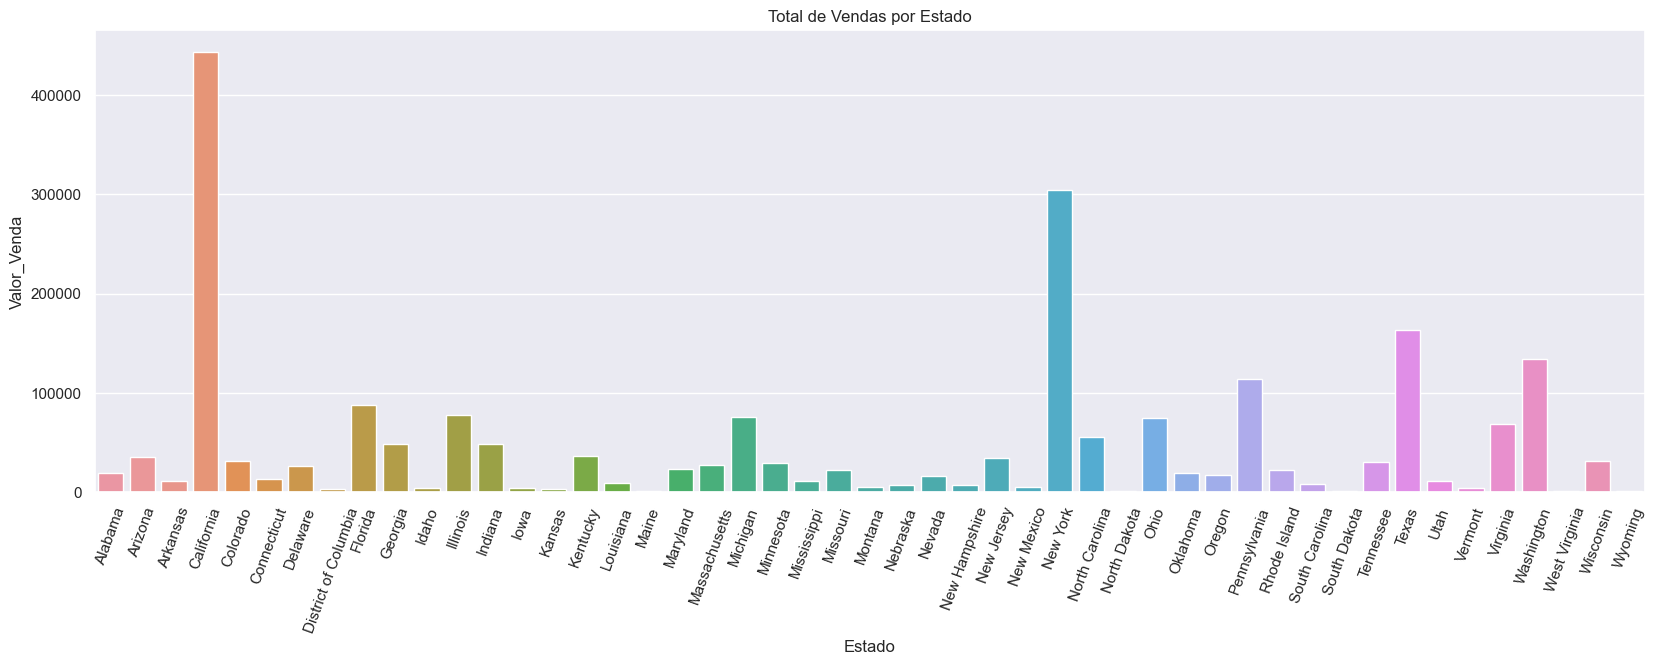

In [206]:
plt.figure(figsize=(20, 6))
sns.barplot(data=df_total_state.reset_index(), x="Estado", y="Valor_Venda").set(title="Total de Vendas por Estado")
plt.xticks(rotation=70)
plt.show()

### Question 3 
Which city has the highest sales Value for products in the 'Office Supplies' category?

In [207]:
df_office_supplies = df_sales[df_sales["Categoria"] == "Office Supplies"]
df_office_supplies.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.620
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.368
6,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,OFF-AR-10002833,Office Supplies,Art,7.280
8,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,OFF-BI-10003910,Office Supplies,Binders,18.504
9,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,OFF-AP-10002892,Office Supplies,Appliances,114.900


In [208]:
df_total_city = df_sales.groupby("Cidade")["Valor_Venda"].sum()
df_total_city.head()

Cidade
Aberdeen         25.500
Abilene           1.392
Akron          2724.244
Albuquerque    2220.160
Alexandria     5519.570
Name: Valor_Venda, dtype: float64

In [209]:
max_total_city = df_total_city.idxmax()
max_total_city

'New York City'

In [210]:
df_total_city.sort_values(ascending=False).head()

Cidade
New York City    251749.219
Los Angeles      171654.633
Seattle          114725.478
San Francisco    107489.952
Philadelphia     107197.803
Name: Valor_Venda, dtype: float64

### Question 4
What are the 10 cities with the highest total sales? Demonstrate the result through a bar graph.

In [211]:
df_10_total_city = df_total_city.reset_index().sort_values(by="Valor_Venda",ascending=False).head(10)
df_10_total_city

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


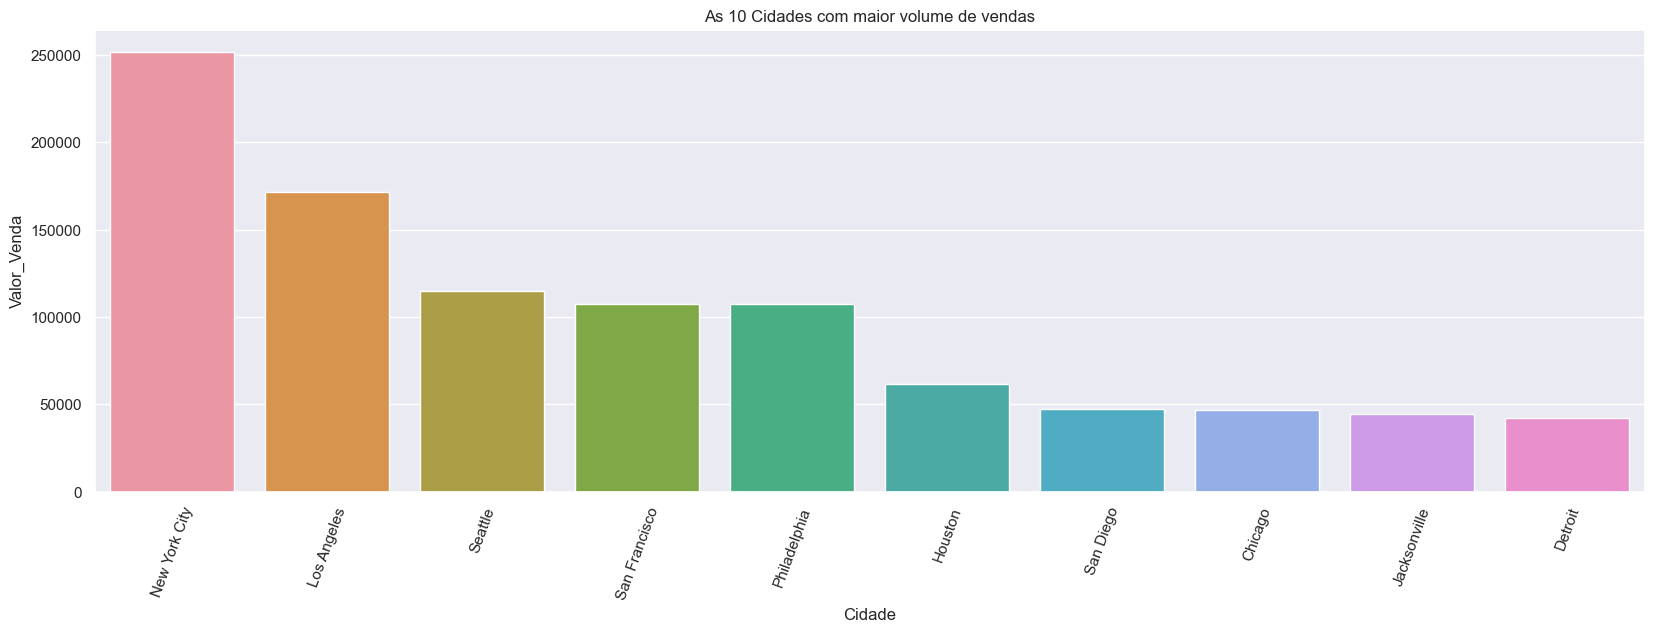

In [212]:
plt.figure(figsize=(20, 6))
sns.set_palette("coolwarm")
sns.barplot(
  data=df_10_total_city, 
  x="Cidade", 
  y="Valor_Venda").set(title="As 10 Cidades com maior volume de vendas")

plt.xticks(rotation=70)
plt.show()

### Question 5
Which segment had the highest total sales? Show the result using a pie/donut chart.

In [213]:
df_total_segment = df_sales.groupby("Segmento")["Valor_Venda"].sum()
df_total_segment_formated = df_total_segment.map(lambda x: "$ {:.2f}".format(x))
df_total_segment_formated

Segmento
Consumer       $ 1133834.33
Corporate       $ 679232.19
Home Office     $ 422491.43
Name: Valor_Venda, dtype: object

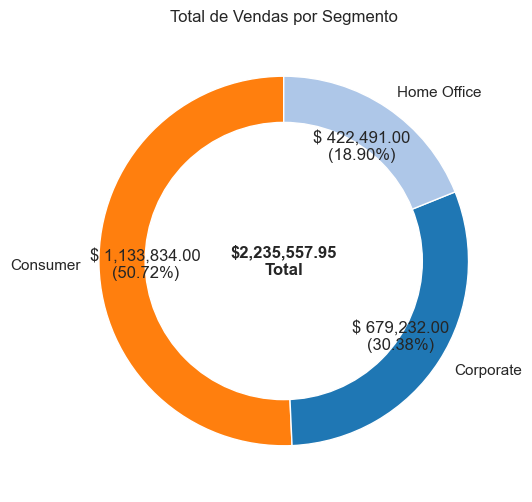

In [214]:
def format_autopct(pct):
  total = sum(df_total_segment)
  val = int(round(pct / 100.0 * total))
  return "$ {:,.2f}\n({:.2f}%)".format(val, pct)

plt.figure(figsize=(20, 6))
plt.pie(
  df_total_segment,       
  labels=df_total_segment.index, 
  autopct=format_autopct,
  startangle=90,
  pctdistance=0.75,  
  labeldistance=1.1, 
  colors=[
    "#ff7f0e",
    "#1f77b4", 
    "#aec7e8", 
    ]
)

centre_circle = plt.Circle((0,0),0.75,fc="white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

total_sales = df_total_segment.sum()
plt.text(
  0, 0, "${:,.2f}\nTotal".format(total_sales), 
  horizontalalignment="center", 
  verticalalignment="center", 
  fontsize=12, 
  fontweight="bold"
)

plt.title("Total de Vendas por Segmento")
plt.show()

### Question 6
What is the total sales per year and per segment?

In [215]:
df_sales["Ano"] = df_sales["Data_Pedido"].dt.year
df_sales.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [216]:
df_total_year_segment = df_sales.groupby(["Ano", "Segmento"])["Valor_Venda"].sum()
df_total_year_segment

Ano   Segmento   
2015  Consumer       256719.9166
      Corporate      125819.5957
      Home Office     88229.0878
2016  Consumer       265295.2593
      Corporate      114643.1229
      Home Office     74134.1332
2017  Consumer       288459.5572
      Corporate      203266.7398
      Home Office    103639.6270
2018  Consumer       323359.6019
      Corporate      235502.7284
      Home Office    156488.5849
Name: Valor_Venda, dtype: float64

### Question 7
The company's managers are considering granting different ranges of discounts and would like to carry out a simulation based on the rule below:

- If the "Valor_Venda" is greater than 1000, you will receive a 15% discount.
- If the "Valor_Venda" is less than 1000, you will receive a 10% discount.

How many sales would each discount receive?

In [217]:
df_sales["Desconto"] = np.where(df_sales["Valor_Venda"] > 1000, 0.15, 0.10)
df_sales.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1


In [218]:
total_sales_discount = df_sales["Desconto"].value_counts()
total_sales_discount

Desconto
0.10    9243
0.15     457
Name: count, dtype: int64

### Question 8
Consider that the company decides to grant a 15% discount on the previous item. What would be the average sales value before and after the discount?

In [219]:
df_sales["Valor_Venda_Desconto"] = df_sales["Valor_Venda"] * (1 - df_sales["Desconto"])
df_sales.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120


In [220]:
df_sales_before_discount = df_sales.loc[df_sales["Desconto"] == 0.15, "Valor_Venda"]
df_sales_before_discount.mean()

2116.8078153172864

In [221]:
df_sales_after_discount = df_sales.loc[df_sales["Desconto"] == 0.15, "Valor_Venda_Desconto"]
df_sales_after_discount.mean()

1799.2866430196934

In [222]:
df_sales_discount = df_sales.loc[df_sales["Desconto"] == 0.15, "Valor_Venda"]
df_sales_discount.mean()

2116.8078153172864

In [223]:
df_sales_discount.mean() * 0.85

1799.2866430196934

### Question 9
What is the average sales per segment, per year and per month? Show the result using a line graph.

In [224]:
df_sales["Mês"] = df_sales["Data_Pedido"].dt.month
df_sales.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_Desconto,Mês
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800,6
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120,10


In [225]:
df_total_year_month_segment = df_sales.groupby(["Ano", "Mês", "Segmento"])["Valor_Venda"].agg([np.sum, np.mean, np.median])
df_total_year_month_segment

sum        mean  median
Ano  Mês Segmento                                   
2015 1   Consumer      6896.6290  146.736787  36.440
         Corporate     1701.5280  130.886769  51.940
         Home Office   5607.5500  329.855882  62.820
     2   Consumer      3167.8540  117.327926  22.776
         Corporate      623.1180   69.235333  62.310
...                          ...         ...     ...
2018 11  Corporate    44357.9862  341.215278  79.530
         Home Office  24009.3840  247.519423  56.560
     12  Consumer     48107.4558  183.616244  52.533
         Corporate    20524.4320  153.167403  46.460
         Home Office  13022.3910  224.523983  49.260

[144 rows x 3 columns]

<Figure size 1200x600 with 0 Axes>

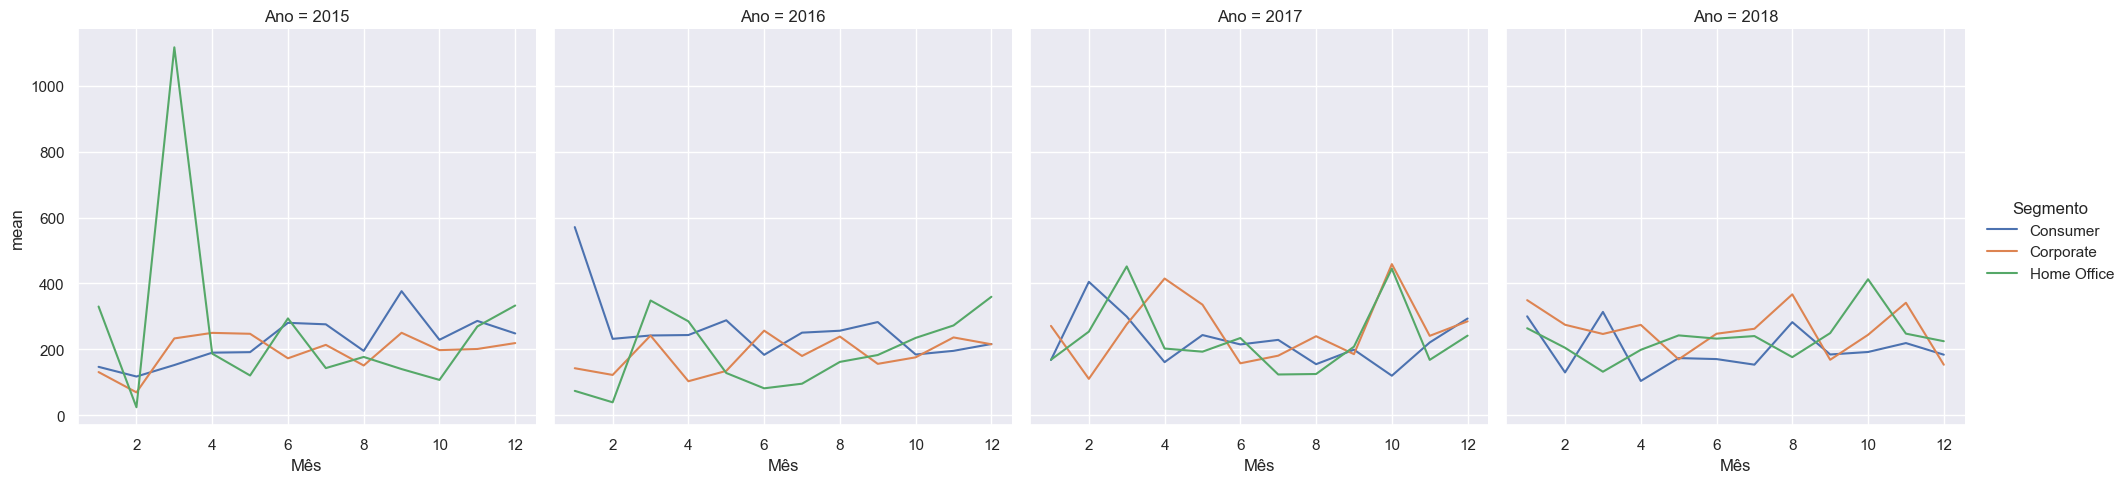

In [226]:
plt.figure(figsize=(12, 6))
sns.set()

years = df_total_year_month_segment.index.get_level_values(0)
monts = df_total_year_month_segment.index.get_level_values(1)
segments = df_total_year_month_segment.index.get_level_values(2)

sns.relplot(
  kind="line",
  data=df_total_year_month_segment,
  y="mean",
  x=monts,
  hue=segments,
  col=years,
  col_wrap=4,
)

plt.show()

### Question 10
What is the total sales per category and sub category, considering only the top 12 sub categories? Show everything through a single graph.

In [227]:
df_by_sub_categories = df_sales.groupby(
  ["Categoria", "SubCategoria"]).sum(numeric_only=True).sort_values("Valor_Venda", ascending=False).head(12)

df_by_sub_categories = df_by_sub_categories[["Valor_Venda"]].astype(int).sort_values(by="Categoria").reset_index()

df_by_sub_categories

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [228]:
df_by_categories = df_by_sub_categories.groupby(["Categoria"]).sum(numeric_only=True).reset_index()
df_by_categories

,Categoria,Valor_Venda
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


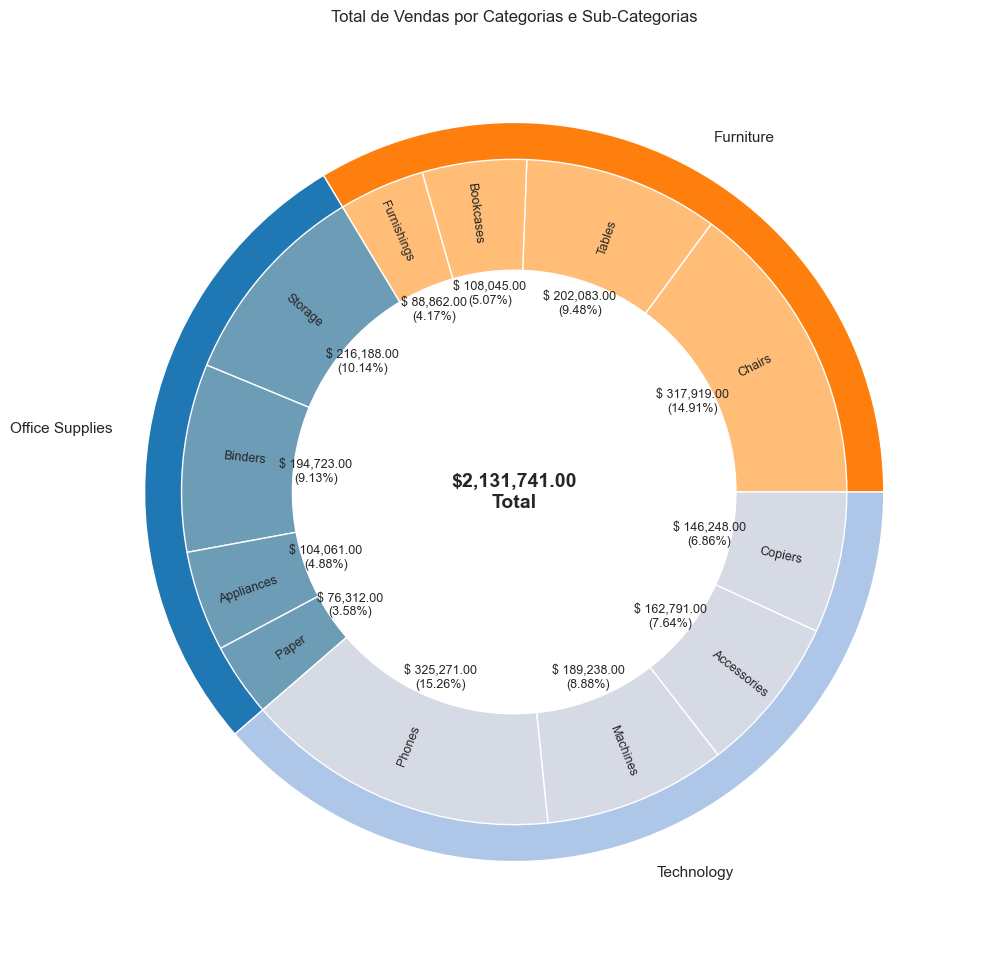

In [229]:
def format_autopct(pct):
  total = sum(df_by_categories["Valor_Venda"])
  val = int(round(pct / 100.0 * total))
  return "$ {:,.2f}\n({:.2f}%)".format(val, pct)

fig, ax = plt.subplots(figsize=(18, 12))

p1 = ax.pie(
  df_by_categories["Valor_Venda"],
  radius=1,
  labels=df_by_categories["Categoria"],
  wedgeprops=dict(edgecolor="white"),
  startangle=0,
  colors=[
    "#ff7f0e",
    "#1f77b4", 
    "#aec7e8", 
    ]
)

p2 = ax.pie(
  df_by_sub_categories["Valor_Venda"],
  radius=0.9,
  labels=df_by_sub_categories["SubCategoria"],
  autopct=format_autopct, # above function
  wedgeprops=dict(edgecolor="white"),
  startangle=0,
  labeldistance=0.75,
  pctdistance=0.6,
  textprops={'fontsize': 9},
  rotatelabels=True,
  colors=[
    "#FFBD77", "#FFBD77", "#FFBD77", "#FFBD77", 
    "#6D9CB7", "#6D9CB7", "#6D9CB7", "#6D9CB7",
    "#D5DAE5", "#D5DAE5", "#D5DAE5", "#D5DAE5",
  ]
)

centre_circle = plt.Circle((0,0),0.6,fc="white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

total_sales = df_by_categories["Valor_Venda"].sum()
plt.text(
  0, 0, "${:,.2f}\nTotal".format(total_sales), 
  horizontalalignment="center", 
  verticalalignment="center", 
  fontsize=14, 
  fontweight="bold"
)

plt.title("Total de Vendas por Categorias e Top 12 Sub-Categorias")
plt.show()
